# Student Data
This Notebook analyzes Pass Fail Data for a class

In [2]:
data = [50, 47, 97, 49, 49, 3, 53, 42, 26, 74, 84, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]

In [3]:
import numpy as np
grades = np.array(data)
print(data*2)
print("Grades:", grades)
print(grades*2)
print("Mean:", np.mean(grades))
print("Median:", np.median(grades))
print("Standard Deviation:", np.std(grades))

[50, 47, 97, 49, 49, 3, 53, 42, 26, 74, 84, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64, 50, 47, 97, 49, 49, 3, 53, 42, 26, 74, 84, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]
Grades: [50 47 97 49 49  3 53 42 26 74 84 62 37 15 70 27 36 35 48 52 63 64]
[100  94 194  98  98   6 106  84  52 148 168 124  74  30 140  54  72  70
  96 104 126 128]
Mean: 49.22727272727273
Median: 49.0
Standard Deviation: 21.381665506566854


In [4]:
grades.shape


(22,)

In [5]:
grades[0]  # Accessing the first element of the grades array

np.int64(50)

In [6]:
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]
student_data = np.array([study_hours, grades])

In [7]:
student_data[0]
student_data[1][0]

np.float64(50.0)

In [8]:
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()
print(f"Average Study Time: {avg_study}\nAverage Grade: {avg_grade}")

Average Study Time: 10.522727272727273
Average Grade: 49.22727272727273


In [9]:
import pandas as pd

df_students = pd.DataFrame({'name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda','Giovanni', 'Francesca','Rajab','Naiyana','Kian','Jenny',
                                     'Jakeem','Helena','Ismat','Anila','Skye','Daniele','Aisha'],
                                     'study_hours': student_data[0], 'grades': student_data[1]})


In [10]:
df_students.loc[5, 'grades']
df_students.loc[5, 'study_hours']
df_students.loc[5]



name           Vicky
study_hours      1.0
grades           3.0
Name: 5, dtype: object

In [11]:
df_students.loc[df_students['name']=='Vicky']

,name,study_hours,grades
5,Vicky,1.0,3.0


In [12]:
df_students.query('name == "Vicky"')

,name,study_hours,grades
5,Vicky,1.0,3.0


In [13]:
df_students[df_students.name == 'Vicky']

,name,study_hours,grades
5,Vicky,1.0,3.0


In [14]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')       #UnComment this to get CSV file, I have commented it as CSV is already there.
df_students.head()

'wget' is not recognized as an internal or external command,
operable program or batch file.


,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


In [15]:
df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [16]:
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

Replace Missing value with Avg Value.

In [17]:
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())

In [18]:
df_students.isnull().sum()

Name          0
StudyHours    0
Grade         2
dtype: int64

In [19]:
df_students = df_students.dropna(axis=0)

In [20]:
df_students.isnull().sum()

Name          0
StudyHours    0
Grade         0
dtype: int64

In [21]:
# Get the mean study hours using ColName as an index
mean_study = df_students['StudyHours'].mean()

# Get the mean grade using the ColName as a property
mean_grade = df_students.Grade.mean()

# Print the mean study hours and mean grade
print('Avg weekly study hours: {:.2f} \nAvg grade: {:.2f}'.format(mean_study, mean_grade))

Avg weekly study hours: 10.52 
Avg grade: 49.18


In [22]:
# Get the students who studied for the mean or more hours
df_students[df_students.StudyHours > mean_study]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


In [23]:
# What was their mean grade?
df_students[df_students.StudyHours > mean_study].Grade.mean()

np.float64(66.7)

In [24]:
passed = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passed.rename("Passed")], axis=1)

# Axis -> Rows - 0, Col - 1

In [25]:
df_students.groupby(df_students.Passed).Name.count()


Passed
False    15
True      7
Name: Name, dtype: int64

In [26]:
df_students.groupby(df_students.Passed).count()

,Name,StudyHours,Grade
Passed,,,
False,15,15,15
True,7,7,7


In [27]:
print(df_students.groupby(df_students.Passed).Grade.mean())

Passed
False    38.000000
True     73.142857
Name: Grade, dtype: float64


In [28]:
# df_students.groupby(df_students.Passed)['StudyHours', 'Grade'].mean()
df_students = df_students.sort_values('Grade', ascending=False)

In [29]:
# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
#df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')       #uncomment this, to read csv

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming 60 is the grade needed to pass
passes = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

# Print the result out into this notebook
df_students

'wget' is not recognized as an internal or external command,
operable program or batch file.


,Name,StudyHours,Grade,Passed,Pass
3,Rosie,16.00,97.0,True,True
10,Francesca,15.50,82.0,True,True
9,Giovanni,14.50,74.0,True,True
14,Jenny,15.50,70.0,True,True
21,Aisha,12.00,64.0,True,True
20,Daniel,12.50,63.0,True,True
11,Rajab,13.75,62.0,True,True
6,Frederic,11.50,53.0,False,False
19,Skye,12.00,52.0,False,False
1,Joann,11.50,50.0,False,False


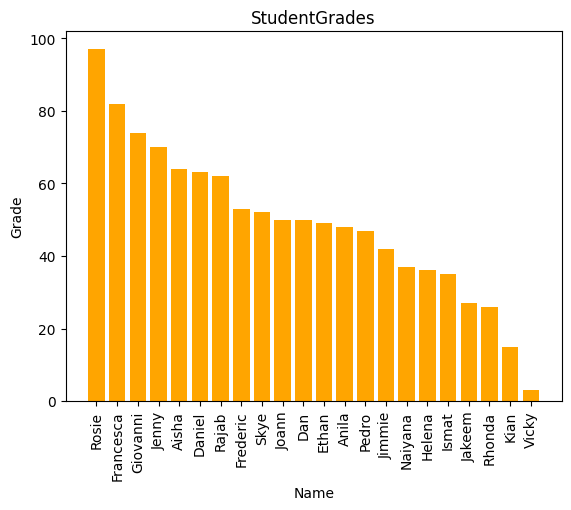

In [30]:
from matplotlib import pyplot as plt

#fig = plt.figure(figsize=(12.8,7.2))     #to change size of graph


plt.bar(x=df_students.Name, height=df_students.Grade, color="Orange")
plt.title("StudentGrades")
plt.xlabel("Name")
plt.ylabel("Grade")
plt.xticks(rotation=90)


plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_15212\522105489.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_students.Name, rotation=90)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15212\522105489.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


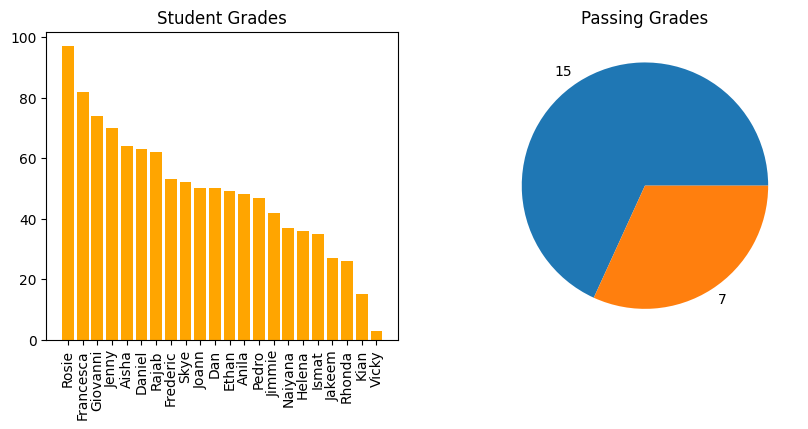

In [31]:

from matplotlib import pyplot as plt

#fig = plt.figure(figsize=(12.8,7.2))     #to change size of graph
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].bar(x=df_students.Name, height=df_students.Grade, color="Orange")
ax[0].set_title("Student Grades")
ax[0].set_xticklabels(df_students.Name, rotation=90)

#passes_count = df_students.Pass.value_counts()
passes_count = df_students.groupby(df_students.Passed).Name.count()
ax[1].pie(passes_count, labels = passes_count)
ax[1].set_title("Passing Grades")


fig.show()

<Axes: title={'center': 'Student Grades'}, xlabel='Name'>

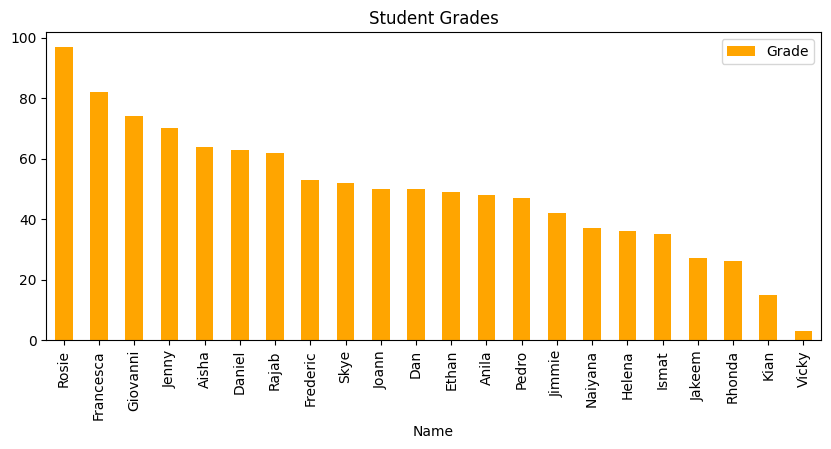

In [32]:
df_students.plot.bar(x='Name', y='Grade', color='Orange', title='Student Grades', figsize=(10, 4))

AttributeError: Figure.show works only for figures managed by pyplot, normally created by pyplot.figure()

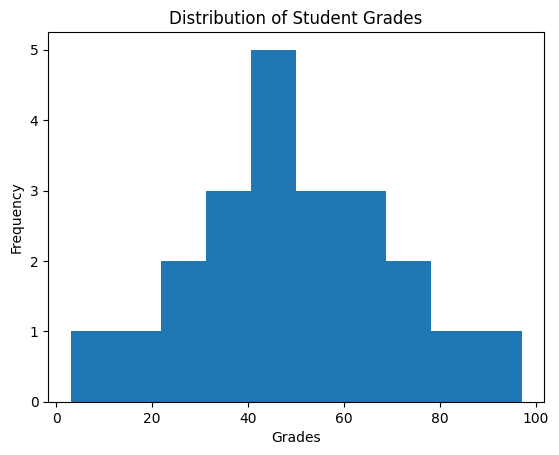

In [33]:


fig = plt.Figure(figsize=(10, 4))

plt.hist(grades)
#plt.hist(grades, bins=10, color='blue', edgecolor='black')

plt.title('Distribution of Student Grades')
plt.xlabel('Grades')
plt.ylabel('Frequency')
fig.show()

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



AttributeError: Figure.show works only for figures managed by pyplot, normally created by pyplot.figure()

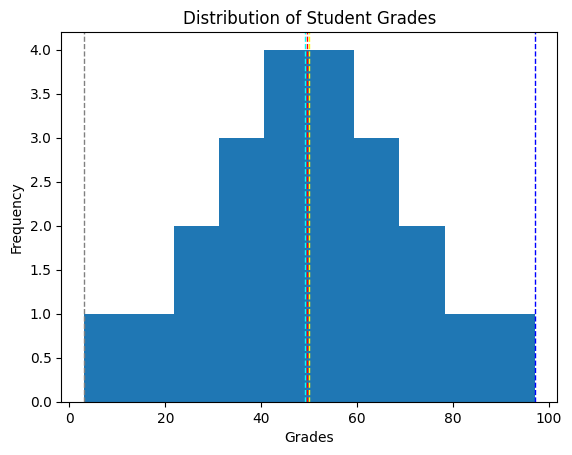

In [ ]:
grades = df_students.Grade

min_val = df_students.Grade.min()
max_val = df_students.Grade.max()
mean_val = df_students.Grade.mean()
median_val = df_students.Grade.median()
mode_val = df_students.Grade.mode().values[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                         mean_val,
                                                                                         median_val,
                                                                                         mode_val,
                                                                                         max_val))
plt.axvline(min_val, color='grey', linestyle='dashed', linewidth=1)
plt.axvline(max_val, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(mean_val, color='cyan', linestyle='dashed', linewidth=1)
plt.axvline(median_val, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mode_val, color='yellow', linestyle='dashed', linewidth=1)

fig = plt.Figure(figsize=(10, 4))

plt.hist(grades)
#plt.hist(grades, bins=10, color='blue', edgecolor='black')

plt.title('Distribution of Student Grades')
plt.xlabel('Grades')
plt.ylabel('Frequency')
fig.show()

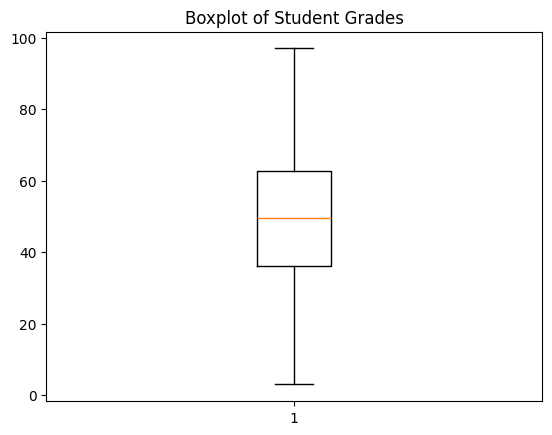

In [ ]:
grades = df_students['Grade']
fig = plt.Figure(figsize=(10, 4))
plt.boxplot(grades)
plt.title('Boxplot of Student Grades')
plt.show()

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\Admin\AppData\Local\Temp\ipykernel_12868\1295439967.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


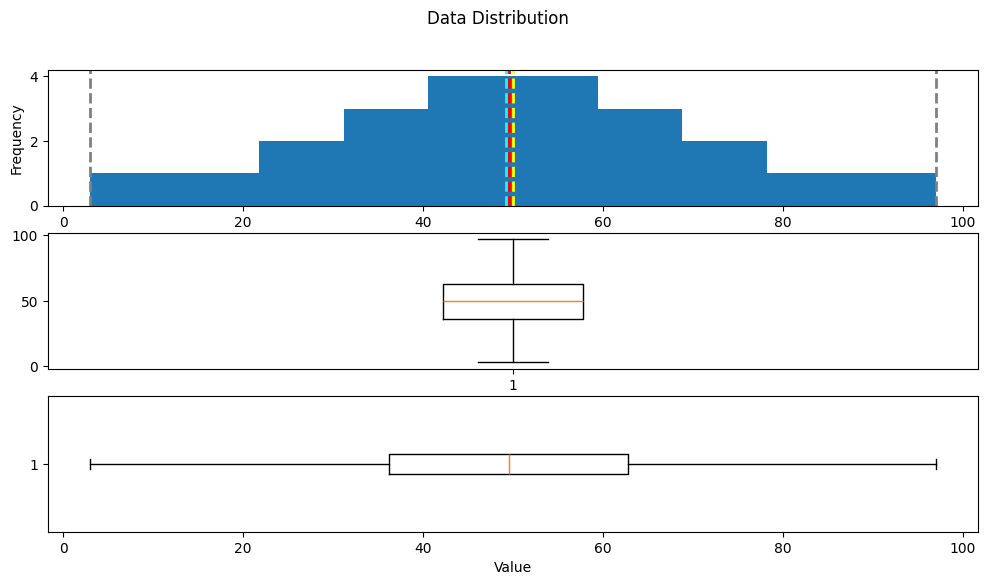

In [ ]:
# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (3 rows, 1 column)
    fig, ax = plt.subplots(3, 1, figsize = (12,6))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data)
    ax[1].set_xlabel('Value')

    # Plot the boxplot vertically  
    ax[2].boxplot(var_data, vert=False)
    ax[2].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


show_distribution(df_students['Grade'])

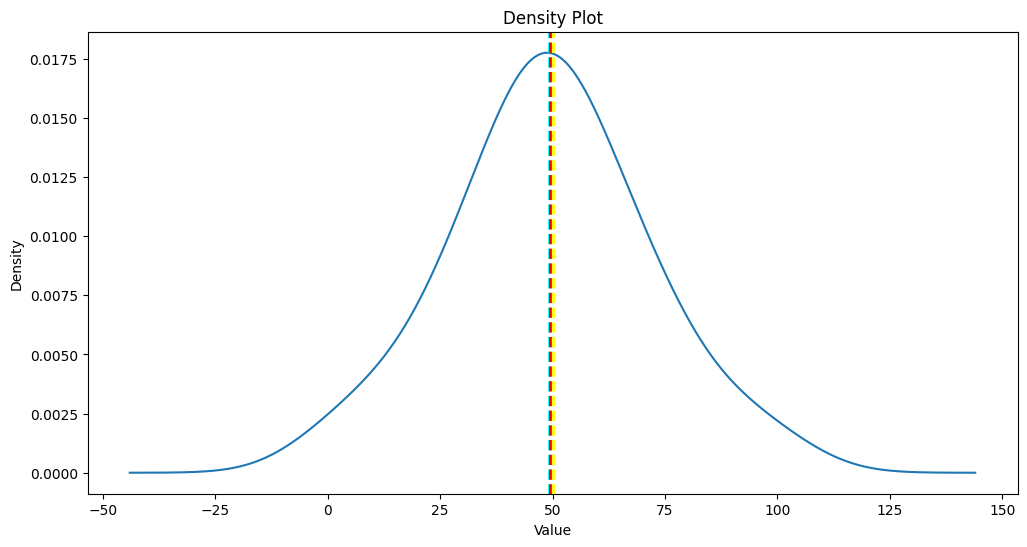

In [ ]:
def show_density(var_data):
    '''
    This function will make a density plot (graph) and display it
    '''

    # Create a figure
    plt.figure(figsize=(12, 6))

    # Plot the density
    var_data.plot.density()

    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Density Plot')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the plot
    plt.show()

show_density(df_students.Grade)

In [ ]:
import scipy
print(scipy.__version__)

1.16.1


Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\Admin\AppData\Local\Temp\ipykernel_12868\1295439967.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


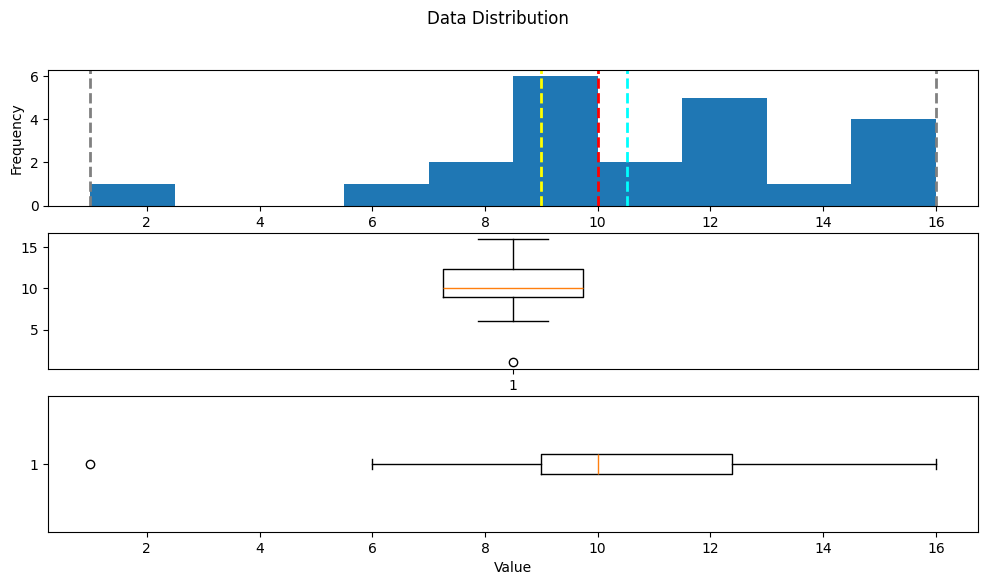

In [ ]:
show_distribution(df_students.StudyHours)

Remove Statistical Outliers from df_students.StudyHours

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\Admin\AppData\Local\Temp\ipykernel_12868\1295439967.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


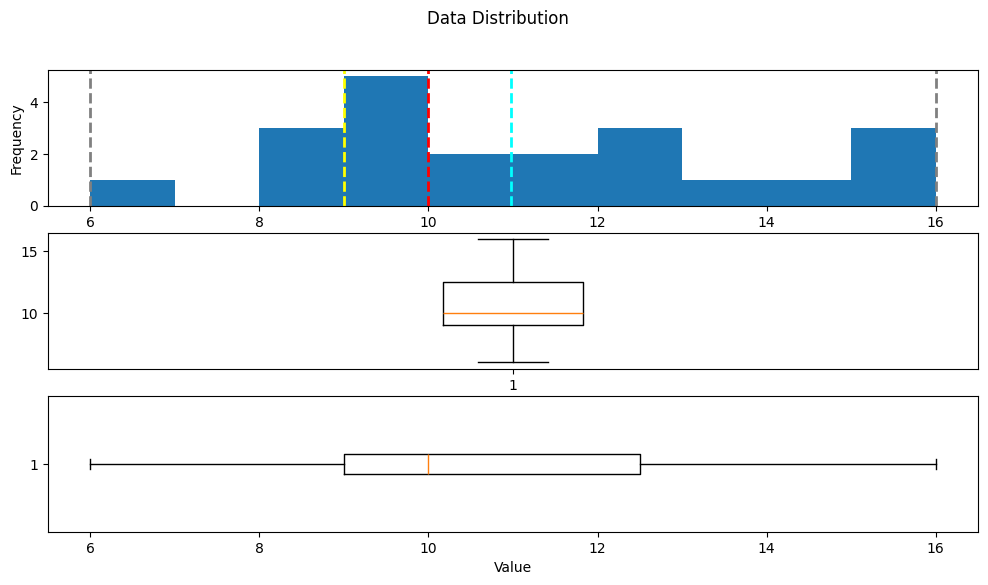

In [ ]:
col = df_students[df_students.StudyHours > 1]['StudyHours']
show_distribution(col)

Generally, Data Scientist do not want to remove Statistical Outliers, rather they want to explain why they are there.

Distribution Function

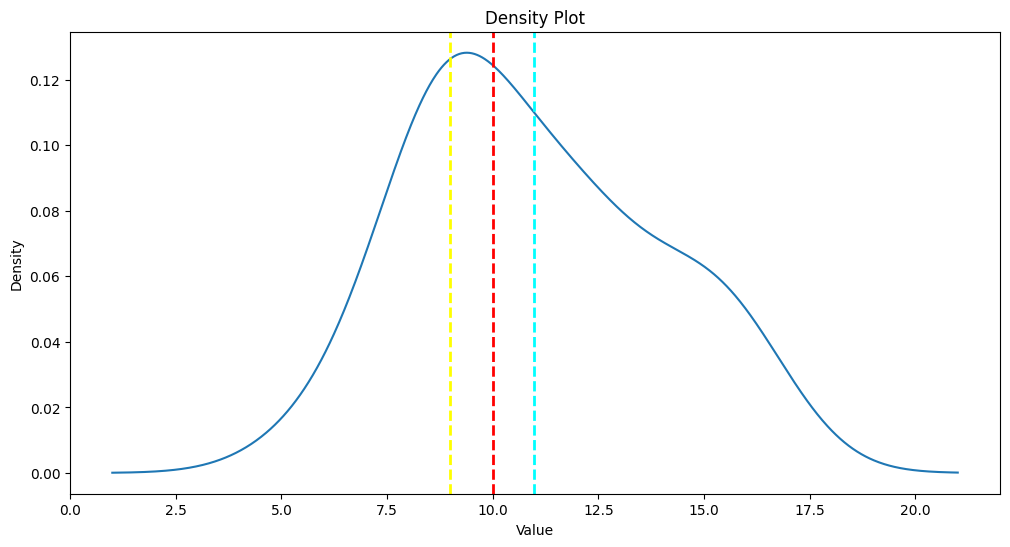

In [ ]:
# Get the density of StudyHours -> Right Side Skewed
show_density(col)

In [ ]:
import math

mean = df_students.StudyHours.mean()
variance = 0

for hours in df_students.StudyHours:
    variance += (hours - mean) ** 2

variance /= df_students.shape[0]

print(variance)

std = math.sqrt(variance)
print(std)

11.607438016528924
3.4069690366260925


In [ ]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))
   


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


In [ ]:
print('68% of Grades will fall between {} and {}'.format(df_students.Grade.mean() - df_students.Grade.std(), df_students.Grade.mean() + df_students.Grade.std()))
print('68% of StudyHours will fall between {} and {}'.format(df_students.StudyHours.mean() - df_students.StudyHours.std(), df_students.StudyHours.mean() + df_students.StudyHours.std()))

68% of Grades will fall between 27.4439066782538 and 70.91972968538256
68% of StudyHours will fall between 7.035583289440498 and 14.009871256014048


In [ ]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In [36]:
df_sample = df_students[df_students.StudyHours > 1]
#df_sample = df_sample.drop('Passed', axis=1)
df_sample

,Name,StudyHours,Grade,Passed,Pass
3,Rosie,16.00,97.0,True,True
10,Francesca,15.50,82.0,True,True
9,Giovanni,14.50,74.0,True,True
14,Jenny,15.50,70.0,True,True
21,Aisha,12.00,64.0,True,True
20,Daniel,12.50,63.0,True,True
11,Rajab,13.75,62.0,True,True
6,Frederic,11.50,53.0,False,False
19,Skye,12.00,52.0,False,False
1,Joann,11.50,50.0,False,False


<Axes: title={'center': 'StudyHours'}, xlabel='Pass'>

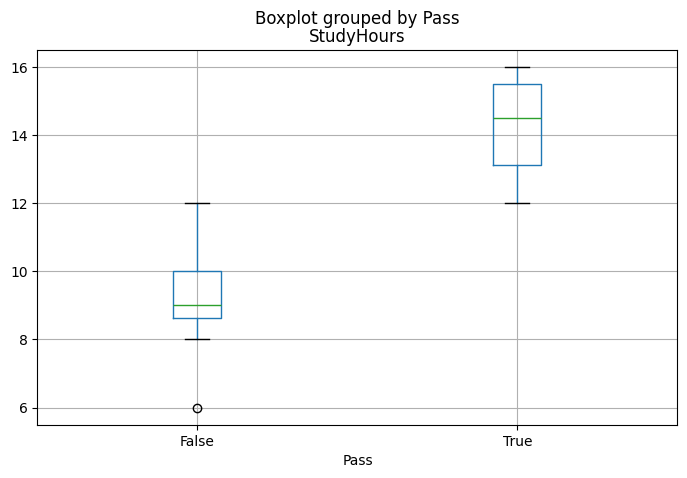

In [37]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

<Axes: title={'center': 'Student Grades vs Study Hours'}, xlabel='Name'>

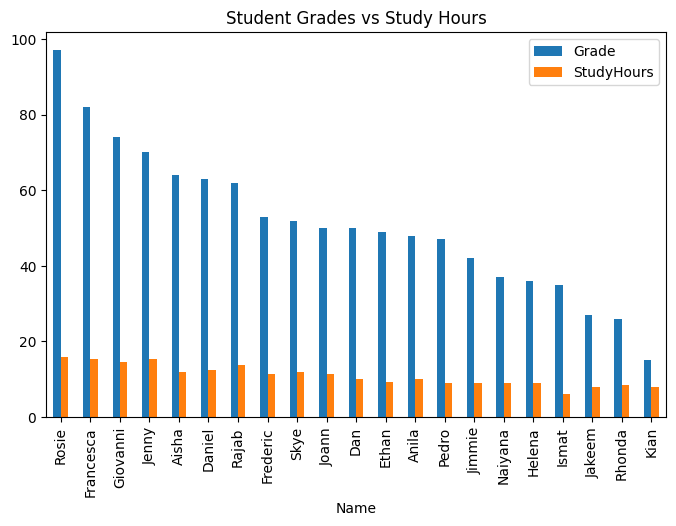

In [38]:
df_sample.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8, 5), title='Student Grades vs Study Hours')

<Axes: title={'center': 'Normalized Student Grades vs Study Hours'}, xlabel='Name'>

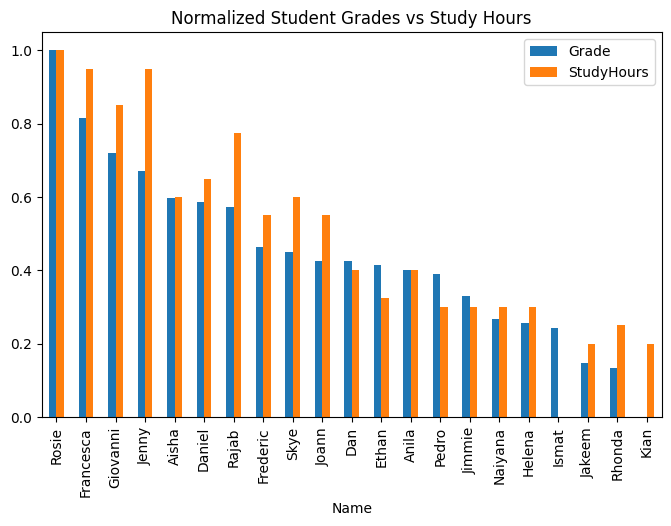

In [39]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

df_normalized[['Grade', 'StudyHours']] = scalar.fit_transform(df_normalized[['Grade', 'StudyHours']])

df_normalized.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8, 5), title='Normalized Student Grades vs Study Hours')

In [40]:
df_normalized.Grade.corr(df_normalized.StudyHours)

np.float64(0.9117666413789672)

<Axes: title={'center': 'Study Hours vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

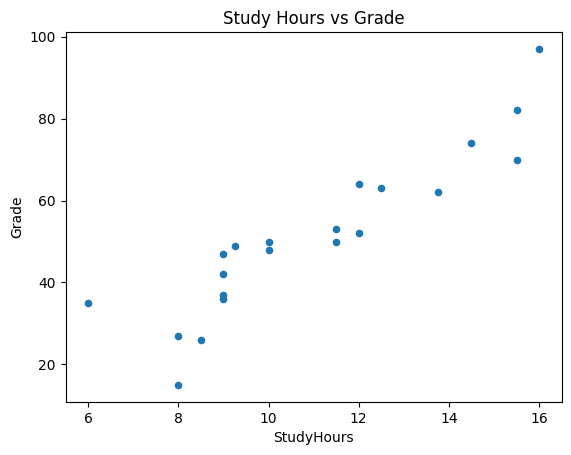

In [44]:
df_sample.plot.scatter(x='StudyHours', y='Grade', title='Study Hours vs Grade')

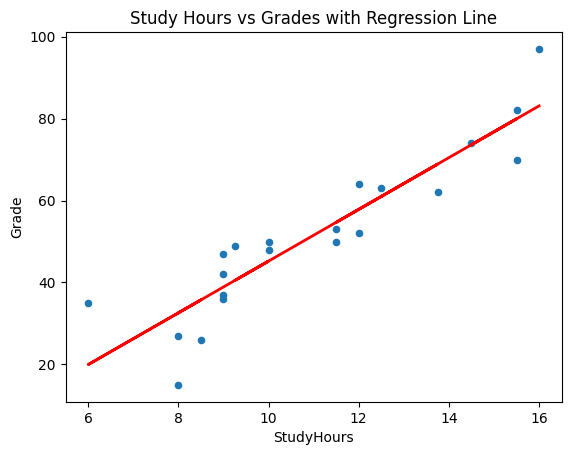

6.313425633792364 -17.916409932816194


In [49]:
from scipy import stats

df_regression = df_sample[['StudyHours', 'Grade']].copy()

m, b, r, o, se = stats.linregress(df_regression.StudyHours, df_regression.Grade)

df_regression['fx'] = (m * df_regression.StudyHours) + b

df_regression['error'] = df_regression['fx'] - df_regression['Grade']

df_regression.plot.scatter(x='StudyHours', y='Grade', title='Study Hours vs Grades with Regression Line')

plt.plot(df_regression.StudyHours, df_regression.fx, color='red', linewidth=2, label='Regression Line')

plt.show()

print(m, b)